# EDA


This exploratory data analysis (EDA) investigates whether team-level performance metrics—such as expected goals (xG), shot accuracy, pressing intensity (PPDA), and deep attacking entries—can help explain and predict match outcomes in the English Premier League. By analyzing league-wide scoring trends and team-specific overperformance patterns, the EDA identifies key features associated with offensive efficiency and tactical execution.

The analysis reveals that factors like shot accuracy, pressing style, and deep entries into dangerous areas are consistently linked to goal overperformance. These insights form a strong foundation for the next phase of this project—building a predictive model. The variables highlighted during EDA will be used as inputs to forecast match outcomes, ensuring the model is grounded in both statistical relevance and tactical context.

**About the Dataset**

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

*(1) Load the original dataset and check the info*

In [ ]:
### Fetch the dataset using OpenML ID
df = fetch_openml(data_id=43655, as_frame=True)['data']
display(df)

,Unnamed:_0,Date,League,Home_Team,Away_Team,Home_Chance_%,Draw_Chance_%,Away_Chance_%,Home_Goals,Away_Goals,...,Home_Shots,Away_Shots,Home_Shots_on_Target,Away_Shots_on_Target,Home_Deep,Away_Deep,Home_PPDA,Away_PPDA,Home_Expected_Points,Away_Expected_Points
0,0,'Aug 08 2015',EPL,'Manchester United',Tottenham,28,40,32,1,0,...,9,9,1,4,4,10,13.83,8.22,1.25,1.35
1,1,'Aug 08 2015',EPL,Bournemouth,'Aston Villa',36,35,29,0,1,...,11,7,2,3,11,2,6.90,11.85,1.42,1.23
2,2,'Aug 08 2015',EPL,Everton,Watford,30,43,27,2,2,...,10,11,5,5,5,4,6.65,17.16,1.33,1.24
3,3,'Aug 08 2015',EPL,Leicester,Sunderland,64,21,15,4,2,...,19,11,8,5,5,6,10.88,9.56,2.13,0.66
4,4,'Aug 08 2015',EPL,Norwich,'Crystal Palace',15,21,64,1,3,...,17,11,6,7,5,10,5.74,10.63,0.65,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,10786,'Mar 08 2020',EPL,Chelsea,Everton,79,17,0,4,0,...,17,3,11,1,9,3,12.71,19.09,2.55,0.29
10787,10787,'Mar 07 2020',EPL,'Crystal Palace',Watford,46,37,17,1,0,...,10,10,3,3,10,7,10.32,5.84,1.74,0.89
10788,10788,'Mar 09 2020',EPL,Leicester,'Aston Villa',82,0,0,4,0,...,15,4,7,1,8,2,5.38,13.22,2.60,0.27
10789,10789,'Mar 07 2020',EPL,Liverpool,Bournemouth,52,28,20,2,1,...,14,6,6,4,9,3,4.75,20.29,1.85,0.88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed:_0            10791 non-null  int64  
 1   Date                  10791 non-null  object 
 2   League                10791 non-null  object 
 3   Home_Team             10791 non-null  object 
 4   Away_Team             10791 non-null  object 
 5   Home_Chance_%         10791 non-null  int64  
 6   Draw_Chance_%         10791 non-null  int64  
 7   Away_Chance_%         10791 non-null  int64  
 8   Home_Goals            10791 non-null  int64  
 9   Away_Goals            10791 non-null  int64  
 10  Home_Expected_Goals   10791 non-null  float64
 11  Away_Expected_Goals   10791 non-null  float64
 12  Home_Shots            10791 non-null  int64  
 13  Away_Shots            10791 non-null  int64  
 14  Home_Shots_on_Target  10791 non-null  int64  
 15  Away_Shots_on_Targe

The dataset contains 10,791 entries with 22 columns, including match details, expected goals (xG), and various performance metrics. The data types are correctly assigned, with numerical values stored as `int64` or `float64` and categorical variables (`Home_Team`, `Away_Team`, `League`, `Date`) stored as `object`.

*(2) Check for missing or inconsistent data*

In [ ]:
### Check for missing or inconsistent data
missing_values = df.isnull().sum()

### Convert 'Date' column to proper datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

### Check for duplicate matches or redundant information
duplicate_rows = df.duplicated().sum()

### Display results in a readable format
print("Missing Values per Column:\n", missing_values)
print("\nTotal Duplicate Rows:", duplicate_rows)

Missing Values per Column:
 Unnamed:_0              0
Date                    0
League                  0
Home_Team               0
Away_Team               0
Home_Chance_%           0
Draw_Chance_%           0
Away_Chance_%           0
Home_Goals              0
Away_Goals              0
Home_Expected_Goals     0
Away_Expected_Goals     0
Home_Shots              0
Away_Shots              0
Home_Shots_on_Target    0
Away_Shots_on_Target    0
Home_Deep               0
Away_Deep               0
Home_PPDA               0
Away_PPDA               0
Home_Expected_Points    0
Away_Expected_Points    0
dtype: int64

Total Duplicate Rows: 0


In [ ]:
### Check for negative values in 'Home_Goals', 'Away_Goals', 'Home_Expected_Goals', and 'Away_Expected_Goals'
negative_goals = df[(df['Home_Goals'] < 0) |
                                   (df['Away_Goals'] < 0) |
                                   (df['Home_Expected_Goals'] < 0) |
                                   (df['Away_Expected_Goals'] < 0)]

### Display rows with negative values (if any)
if not negative_goals.empty:
    print("Rows with negative values in goals or xG:")
    display(negative_goals)
else:
    print("No negative values found in goals or xG.")

No negative values found in goals or xG.


The dataset is complete and clean, with **no missing values or duplicate rows**, ensuring reliable analysis.

*(3) Filter the data and get the final cleaned dataset*

Since I want to use full seasons to ensure that all teams (except for those who have relegated or promoted in the years) play the same number of matches (both home and away), I decided to choose **English Premier League** as my research direction and I limit the time period from **2014-08-16 to 2019-05-12**, which represents the beginning of 14-15 season and the end of 18-19 season. This makes sure that my dataset contains **five complete seasons for English Premier League**.

In [ ]:
### Filter for Premier League ("EPL") matches only
df_epl = df[df['League'] == "EPL"]

### Further filter for data up to "2019-05-12" (End of the 18-19 season)
df_date = df_epl[df_epl['Date'] <= "2019-05-12"]

### Sort the filtered dataset by Date in ascending order
df_order = df_date.sort_values(by='Date', ascending=True)

### Reset index for cleaner display
df_filtered = df_order.reset_index(drop=True)

### Drop the unwanted column (adjust column name if necessary)
df_filtered_final = df_filtered.drop(columns=['Unnamed:_0'], errors='ignore')

### Clean team names by removing extra quotes and spaces
df_filtered_final['Home_Team'] = df_filtered_final['Home_Team'].str.strip().str.replace("'", "")
df_filtered_final['Away_Team'] = df_filtered_final['Away_Team'].str.strip().str.replace("'", "")

### Display the cleaned dataset
display(df_filtered_final)

,Date,League,Home_Team,Away_Team,Home_Chance_%,Draw_Chance_%,Away_Chance_%,Home_Goals,Away_Goals,Home_Expected_Goals,...,Home_Shots,Away_Shots,Home_Shots_on_Target,Away_Shots_on_Target,Home_Deep,Away_Deep,Home_PPDA,Away_PPDA,Home_Expected_Points,Away_Expected_Points
0,2014-08-16,EPL,Arsenal,Crystal Palace,90,0,0,2,1,1.55,...,14,4,6,2,9,0,2.93,14.17,2.79,0.11
1,2014-08-16,EPL,Manchester United,Swansea,65,28,0,1,2,1.17,...,14,5,5,4,8,2,10.12,17.95,2.24,0.48
2,2014-08-16,EPL,Leicester,Everton,55,29,16,2,2,1.28,...,11,13,3,3,1,15,14.48,11.69,1.95,0.76
3,2014-08-16,EPL,Queens Park Rangers,Hull,59,24,17,0,1,1.90,...,19,11,6,4,1,5,12.82,10.29,2.01,0.74
4,2014-08-16,EPL,Stoke,Aston Villa,15,36,49,0,1,0.42,...,12,7,2,1,3,4,4.13,14.04,0.80,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-12,EPL,Southampton,Huddersfield,35,35,30,1,1,0.94,...,10,10,3,3,9,1,9.18,11.83,1.41,1.24
1896,2019-05-12,EPL,Tottenham,Everton,0,21,71,2,2,0.88,...,11,17,3,9,5,7,14.61,14.63,0.44,2.35
1897,2019-05-12,EPL,Watford,West Ham,16,19,65,1,4,2.07,...,17,16,8,9,7,6,12.73,10.35,0.66,2.15
1898,2019-05-12,EPL,Manchester United,Cardiff,40,26,34,0,2,1.90,...,26,13,10,4,13,2,3.70,23.67,1.47,1.27


As is shown, the cleaned final dataframe has 1900 rows and 21 columns. The validility of the dataframe can be checked also by calculating. In theory, EPL has 20 different teams and 380 different matches between them per season. Since my research is for five complete seasons, we can calculate that 380 * 5 = 1900, which shows that the dataframe correctly stores all the match statistics in these five seasons. This means that the dataframe is correct and I can step into the research.

**Main Research**

*Part 1: League-Wide Scoring Trends as a Baseline for Match Outcome Modeling*

This section explores EPL scoring trends over multiple seasons by comparing expected goals (xG) and actual goals. By identifying consistent patterns in over- and underperformance, we establish a baseline understanding of scoring dynamics. This provides foundational insight for predicting match outcomes, particularly whether teams systematically outperform or underperform expectations.

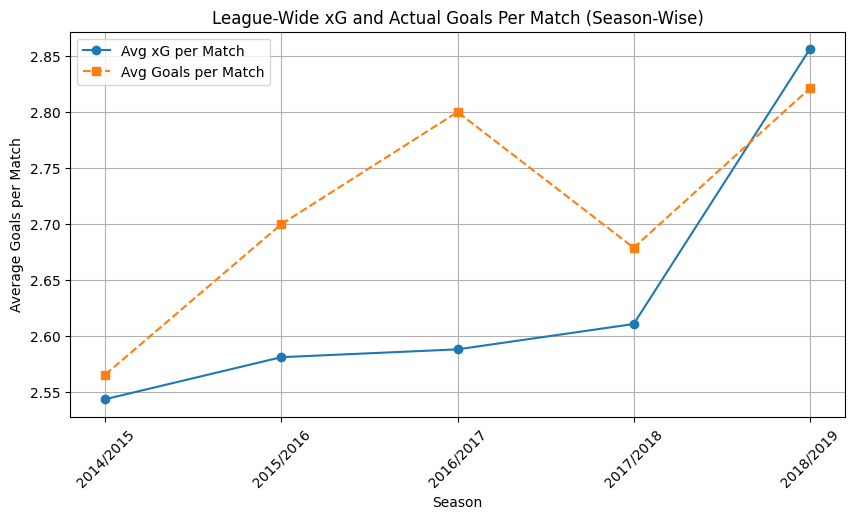

In [ ]:
### Extract season from date (one season runs from August-May)
df_filtered_final['Season'] = df_filtered_final['Date'].apply(lambda x: f"{x.year-1}/{x.year}" if x.month < 8 else f"{x.year}/{x.year+1}")

### Group by season and compute average xG and actual goals per match
seasonal_stats = df_filtered_final.groupby('Season').agg({
    'Home_Expected_Goals': 'mean',
    'Away_Expected_Goals': 'mean',
    'Home_Goals': 'mean',
    'Away_Goals': 'mean'
}).reset_index()

### Compute total xG and actual goals per match (home + away)
seasonal_stats['Avg_xG_per_Match'] = seasonal_stats['Home_Expected_Goals'] + seasonal_stats['Away_Expected_Goals']
seasonal_stats['Avg_Goals_per_Match'] = seasonal_stats['Home_Goals'] + seasonal_stats['Away_Goals']

### Sort by season in chronological order
seasonal_stats = seasonal_stats.sort_values(by='Season')

### Plot the trends
plt.figure(figsize=(10, 5))
plt.plot(seasonal_stats['Season'], seasonal_stats['Avg_xG_per_Match'], marker='o', label='Avg xG per Match')
plt.plot(seasonal_stats['Season'], seasonal_stats['Avg_Goals_per_Match'], marker='s', label='Avg Goals per Match', linestyle='dashed')

### Plotting and Formatting
plt.xlabel('Season')
plt.ylabel('Average Goals per Match')
plt.title('League-Wide xG and Actual Goals Per Match (Season-Wise)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

### Show the plot
plt.show()

This figure shows how average xG and actual goals per match evolve across seasons. Notable gaps between the two highlight scoring inefficiencies or excesses across the league—suggesting systemic factors at play. This motivates the modeling task of identifying team-level predictors for such deviations, which may ultimately translate into match outcomes.


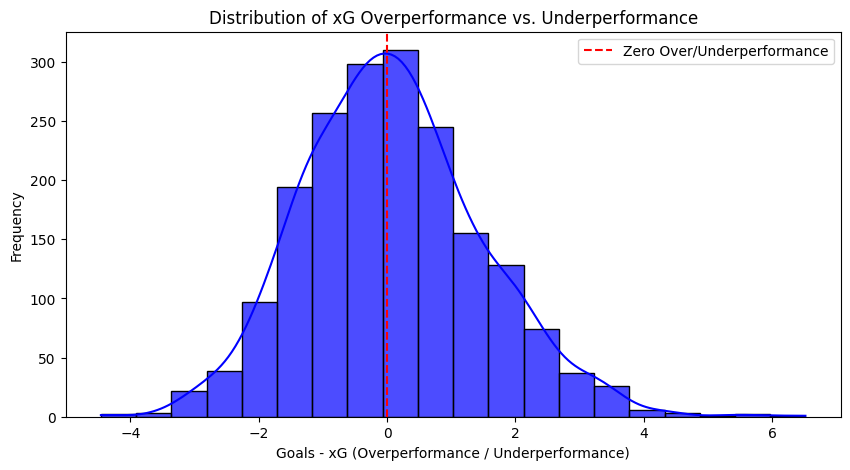

In [ ]:
### Compute xG difference (overperformance/underperformance)
df_filtered_final['xG_Difference'] = (df_filtered_final['Home_Goals'] + df_filtered_final['Away_Goals']) - \
                                     (df_filtered_final['Home_Expected_Goals'] + df_filtered_final['Away_Expected_Goals'])

### Plot the distribution of xG difference
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered_final['xG_Difference'], kde=True, bins=20, color='blue', alpha=0.7)

### Plotting and Formatting
plt.xlabel('Goals - xG (Overperformance / Underperformance)')
plt.ylabel('Frequency')
plt.title('Distribution of xG Overperformance vs. Underperformance')
plt.axvline(0, color='red', linestyle='dashed', label='Zero Over/Underperformance')  # Reference line at 0
plt.legend()
plt.show()

The distribution reveals that match-level xG deviations are widespread and non-random, indicating the presence of systematic drivers. Modeling these deviations using team-level features may help forecast whether a team will exceed, match, or fall short of expected scoring—which relates directly to predicting match outcomes.

*Part 2: Team-Level Scoring Efficiency by Venue as Predictors of Match Results*

After identifying league-wide scoring patterns, this section zooms into team-level metrics—such as goals and xG at home versus away. These differences highlight contextual performance factors that may influence match outcomes. For modeling, such location-based patterns could provide features to help predict whether a team is more likely to win based on venue.

In [ ]:
### Grouping Home and Away performances separately
home_stats = df_filtered_final.groupby('Home_Team').agg({
    'Home_Expected_Goals': 'mean',
    'Home_Goals': 'mean',
    'Home_Team': 'count'
}).rename(columns={
    'Home_Expected_Goals': 'Expected_Goals_Home',
    'Home_Goals': 'Avg_Goals_Home',
    'Home_Team': 'Home_Matches'
})

away_stats = df_filtered_final.groupby('Away_Team').agg({
    'Away_Expected_Goals': 'mean',
    'Away_Goals': 'mean',
    'Away_Team': 'count'
}).rename(columns={
    'Away_Expected_Goals': 'Expected_Goals_Away',
    'Away_Goals': 'Avg_Goals_Away',
    'Away_Team': 'Away_Matches'
})

### Merge home and away stats into one table
team_stats = home_stats.merge(away_stats, left_index=True, right_index=True, how='outer')

### Compute the total Expected Goals and Actual Goals per match for each team
team_stats['Avg_xG_per_Match'] = (
    team_stats['Expected_Goals_Home'].fillna(0) + team_stats['Expected_Goals_Away'].fillna(0)
) / 2
team_stats['Avg_Goals_per_Match'] = (
    team_stats['Avg_Goals_Home'].fillna(0) + team_stats['Avg_Goals_Away'].fillna(0)
) / 2

### Compute overperformance (Goals - xG)
team_stats['Goal_Diff'] = team_stats['Avg_Goals_per_Match'] - team_stats['Avg_xG_per_Match']

### Compute the total number of matches played by each team
team_stats['Total_Matches'] = team_stats['Home_Matches'].fillna(0) + team_stats['Away_Matches'].fillna(0)

### Reset index and rename for cleaner display
team_stats = team_stats.reset_index().rename(columns={'index': 'Team', 'Home_Team': 'Team'})

### Sort by Total Matches in descending order (optional filtering step)
team_stats_final = team_stats.sort_values(by='Total_Matches', ascending=False)

### Display the cleaned team stats
display(team_stats_final)

,Team,Expected_Goals_Home,Avg_Goals_Home,Home_Matches,Expected_Goals_Away,Avg_Goals_Away,Away_Matches,Avg_xG_per_Match,Avg_Goals_per_Match,Goal_Diff,Total_Matches
0,Arsenal,2.143053,2.178947,95,1.477579,1.610526,95,1.810316,1.894737,0.084421,190
12,Leicester,1.501789,1.505263,95,1.271579,1.326316,95,1.386684,1.415789,0.029105,190
8,Everton,1.464211,1.705263,95,1.126211,1.105263,95,1.295211,1.405263,0.110053,190
7,Crystal Palace,1.405684,1.178947,95,1.121474,1.263158,95,1.263579,1.221053,-0.042526,190
6,Chelsea,1.828316,2.021053,95,1.414316,1.578947,95,1.621316,1.800000,0.178684,190
20,Southampton,1.530000,1.473684,95,1.129368,1.010526,95,1.329684,1.242105,-0.087579,190
15,Manchester United,1.678947,1.736842,95,1.319579,1.400000,95,1.499263,1.568421,0.069158,190
24,Tottenham,1.839158,1.968421,95,1.492737,1.757895,95,1.665947,1.863158,0.197211,190
27,West Ham,1.323895,1.410526,95,1.140105,1.284211,95,1.232000,1.347368,0.115368,190
14,Manchester City,2.462316,2.589474,95,1.822421,1.989474,95,2.142368,2.289474,0.147105,190


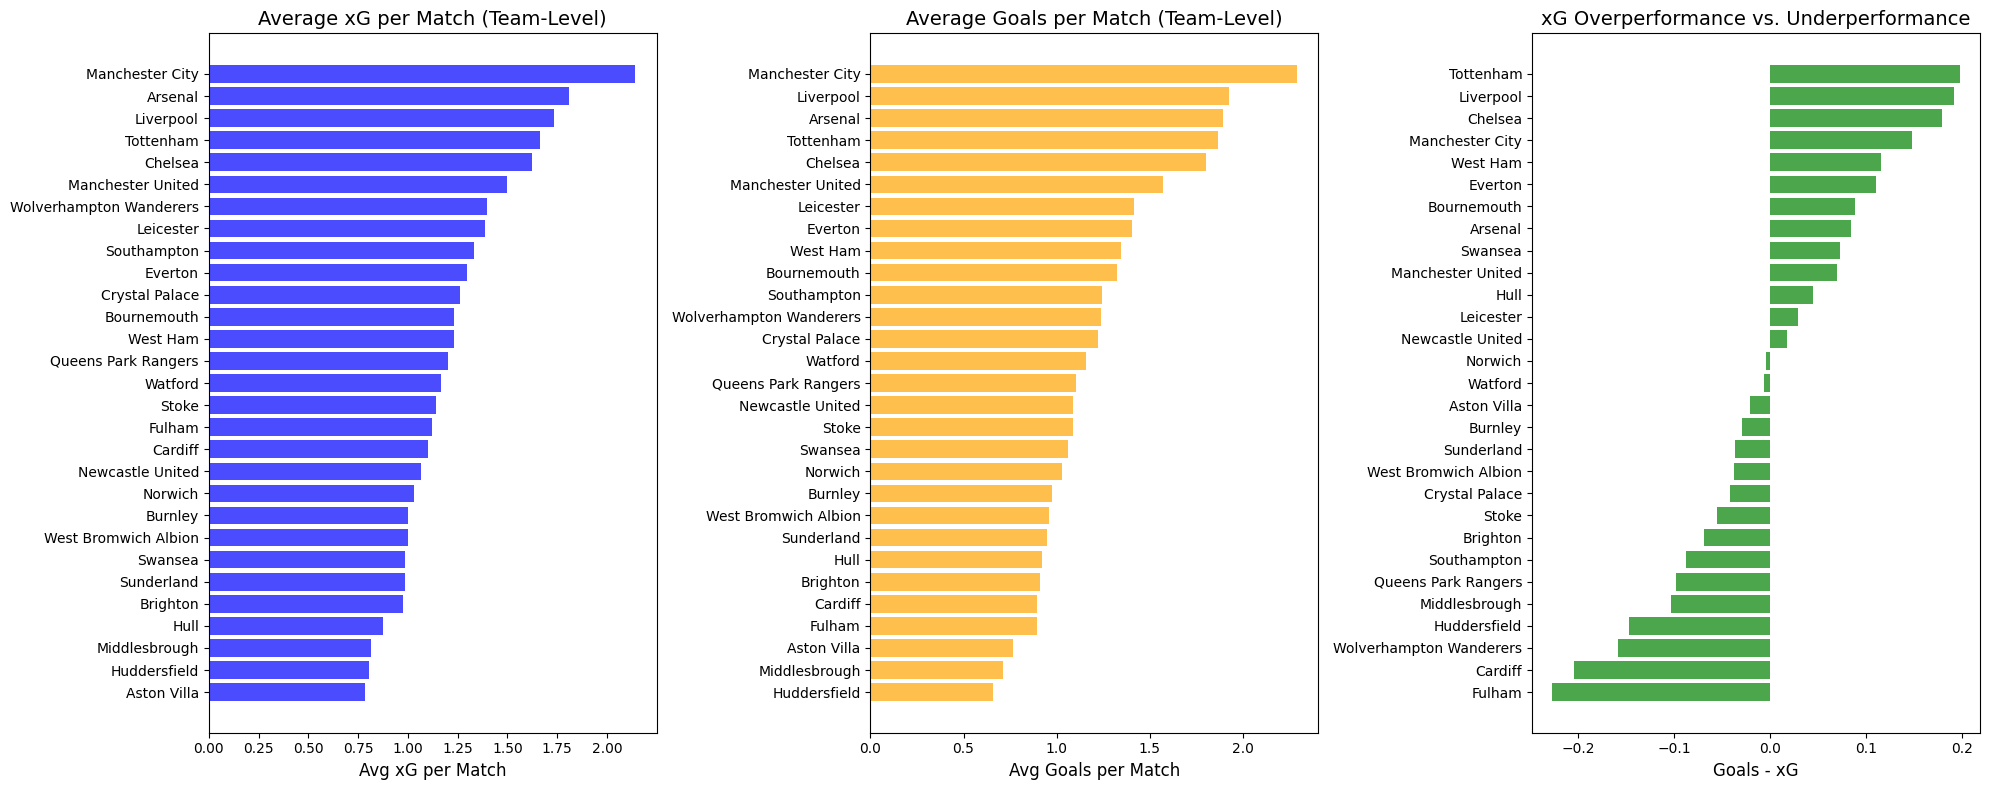

In [ ]:
### Compute the difference (Overperformance/Underperformance)
team_stats_final['xG_Difference'] = team_stats_final['Avg_Goals_per_Match'] - team_stats_final['Avg_xG_per_Match']

### Sort data by each metric
sorted_xG = team_stats_final.sort_values(by='Avg_xG_per_Match', ascending=False)
sorted_Goals = team_stats_final.sort_values(by='Avg_Goals_per_Match', ascending=False)
sorted_Diff = team_stats_final.sort_values(by='xG_Difference', ascending=False)

### Set figure size
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

### Bar Plot 1: Avg xG per Match
axes[0].barh(sorted_xG['Team'], sorted_xG['Avg_xG_per_Match'], color="blue", alpha=0.7)
axes[0].set_xlabel("Avg xG per Match", fontsize=12)
axes[0].set_title("Average xG per Match (Team-Level)", fontsize=14)
axes[0].invert_yaxis()

### Bar Plot 2: Avg Goals per Match
axes[1].barh(sorted_Goals['Team'], sorted_Goals['Avg_Goals_per_Match'], color="orange", alpha=0.7)
axes[1].set_xlabel("Avg Goals per Match", fontsize=12)
axes[1].set_title("Average Goals per Match (Team-Level)", fontsize=14)
axes[1].invert_yaxis()

### Bar Plot 3: xG Difference (Goals - xG)
axes[2].barh(sorted_Diff['Team'], sorted_Diff['xG_Difference'], color="green", alpha=0.7)
axes[2].set_xlabel("Goals - xG", fontsize=12)
axes[2].set_title("xG Overperformance vs. Underperformance", fontsize=14)
axes[2].invert_yaxis()

### Adjust layout for clarity
plt.tight_layout()
plt.show()

These bar charts offer a comparative view of team-level performance based on expected goals (xG), actual goals, and the difference between them. Teams like Manchester City, Arsenal, and Liverpool consistently top all three charts, indicating strong attacking quality and finishing efficiency. Their positive xG difference suggests consistent overperformance, likely due to clinical conversion of chances. In contrast, teams such as Fulham, Cardiff, and Huddersfield appear at the bottom across metrics, reflecting limited chance creation and inefficient finishing—traits often associated with relegation risk. These trends are not only descriptive but also informative for modeling: persistent over- or underperformance relative to xG may serve as a predictive feature in evaluating future match outcomes.

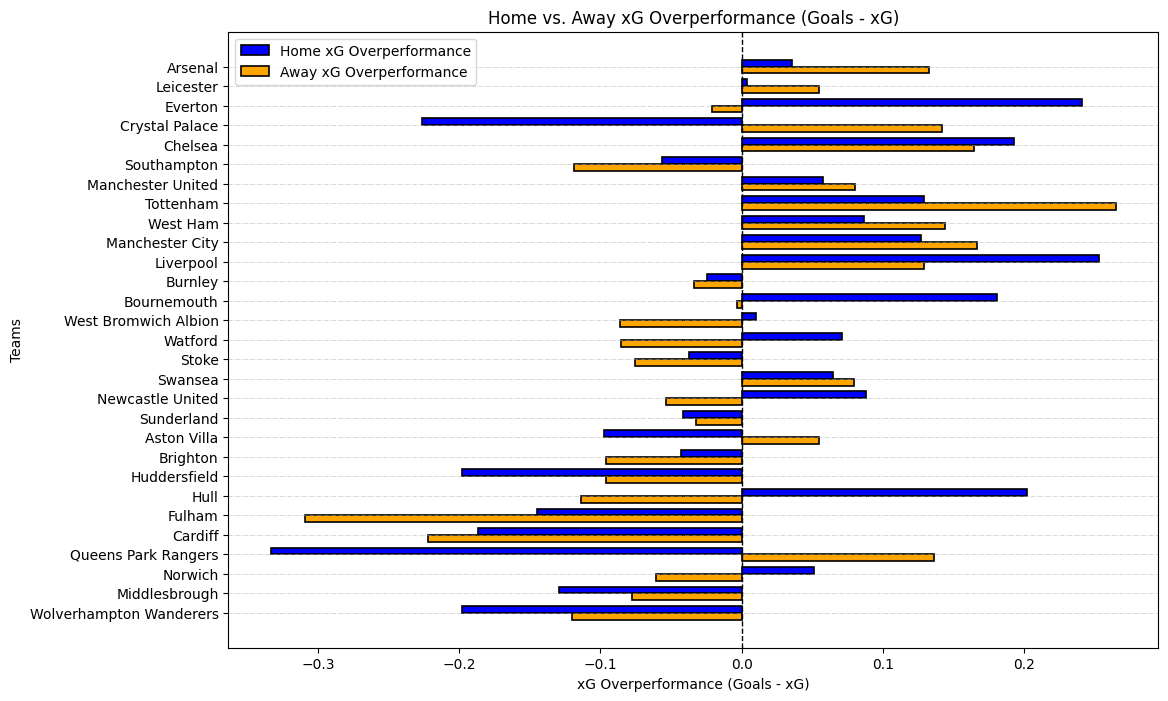

In [ ]:
### Calculate the 'xG_Overperformance_Home' and 'xG_Overperformance_Away'
team_stats_final['xG_Overperformance_Home'] = team_stats_final['Avg_Goals_Home'] - team_stats_final['Expected_Goals_Home']
team_stats_final['xG_Overperformance_Away'] = team_stats_final['Avg_Goals_Away'] - team_stats_final['Expected_Goals_Away']

### Set the number of teams
teams = team_stats_final['Team']
y_pos = np.arange(len(teams))

### Set bar width
bar_width = 0.35

### Plot home and away xG overperformance side by side with better spacing and grid lines
plt.figure(figsize=(12, 8))
plt.barh(y_pos - bar_width/2, team_stats_final['xG_Overperformance_Home'],
         color='blue', height=bar_width, label='Home xG Overperformance', edgecolor='black', linewidth=1.2)
plt.barh(y_pos + bar_width/2, team_stats_final['xG_Overperformance_Away'],
         color='orange', height=bar_width, label='Away xG Overperformance', edgecolor='black', linewidth=1.2)

### Plotting and Formatting
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.yticks(y_pos, teams)
plt.xlabel("xG Overperformance (Goals - xG)")
plt.ylabel("Teams")
plt.title("Home vs. Away xG Overperformance (Goals - xG)")

### Add grid lines for better readability and team separation
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.7)  # Horizontal grid lines

### Improve spacing by reversing the order of teams so the most relevant ones are at the top
plt.gca().invert_yaxis()

plt.legend()
plt.show()

This visualization dissects team-level xG overperformance into home and away contexts. It reveals that while many teams follow the general trend of performing better at home, others like Crystal Palace show stark disparities, heavily overperforming at home while underperforming away. These contrasts may stem from tactical adjustments, psychological comfort, or crowd influence. Understanding these splits will help inform our later modeling efforts—especially when building predictive models that incorporate location-based features such as home/away indicators.

*Part 3: Shot Volume and Accuracy as Predictors of Match Outcomes*


This section investigates whether teams that shoot more or shoot more accurately tend to perform better in terms of match results. We examine whether higher shot volume or greater shot accuracy correlates with better-than-expected outcomes. These offensive metrics are evaluated as potential inputs for a predictive model of match outcomes.

In [ ]:
### Groupby home and away performances separately
home_stats = df_filtered_final.groupby("Home_Team").agg({
    "Home_Expected_Goals": "mean",
    "Home_Goals": "mean",
    "Home_Shots": "sum",
    "Home_Shots_on_Target": "sum",
    "Home_Team": "count"
}).rename(columns={
    "Home_Expected_Goals": "Expected_Goals_Home",
    "Home_Goals": "Avg_Goals_Home",
    "Home_Shots": "Total_Home_Shots",
    "Home_Shots_on_Target": "Total_Home_Shots_on_Target",
    "Home_Team": "Home_Matches"
})

away_stats = df_filtered_final.groupby("Away_Team").agg({
    "Away_Expected_Goals": "mean",
    "Away_Goals": "mean",
    "Away_Shots": "sum",
    "Away_Shots_on_Target": "sum",
    "Away_Team": "count"
}).rename(columns={
    "Away_Expected_Goals": "Expected_Goals_Away",
    "Away_Goals": "Avg_Goals_Away",
    "Away_Shots": "Total_Away_Shots",
    "Away_Shots_on_Target": "Total_Away_Shots_on_Target",
    "Away_Team": "Away_Matches"
})

### Merge home and away statistics into a single dataframe
team_stats_final2 = home_stats.merge(away_stats, left_index=True, right_index=True, how="outer").fillna(0)

### Compute the total number of matches played by each team (home + away matches)
team_stats_final2["Total_Matches"] = team_stats_final2["Home_Matches"] + team_stats_final2["Away_Matches"]

### Compute the average expected goals (xG) per match for each team
team_stats_final2["Avg_xG_per_Match"] = (team_stats_final2["Expected_Goals_Home"] + team_stats_final2["Expected_Goals_Away"]) / 2

### Compute the average actual goals per match for each team
team_stats_final2["Avg_Goals_per_Match"] = (team_stats_final2["Avg_Goals_Home"] + team_stats_final2["Avg_Goals_Away"]) / 2

### Compute xG Overperformance (difference between actual goals per match and expected goals per match)
team_stats_final2["xG_Overperformance"] = (team_stats_final2["Avg_Goals_per_Match"] - team_stats_final2["Avg_xG_per_Match"])

### Compute the average number of shots per match for each team (combining home and away)
team_stats_final2["Shots_per_Match"] = ((team_stats_final2["Total_Home_Shots"] + team_stats_final2["Total_Away_Shots"]) / team_stats_final2["Total_Matches"]).fillna(0)

### Compute the average number of shots on target per match (combining home and away)
team_stats_final2["Shots_on_Target_per_Match"] = ((team_stats_final2["Total_Home_Shots_on_Target"] + team_stats_final2["Total_Away_Shots_on_Target"]) / team_stats_final2["Total_Matches"]).fillna(0)

# Display the final processed dataframe
display(team_stats_final2)


,Expected_Goals_Home,Avg_Goals_Home,Total_Home_Shots,Total_Home_Shots_on_Target,Home_Matches,Expected_Goals_Away,Avg_Goals_Away,Total_Away_Shots,Total_Away_Shots_on_Target,Away_Matches,Total_Matches,Avg_xG_per_Match,Avg_Goals_per_Match,xG_Overperformance,Shots_per_Match,Shots_on_Target_per_Match
Home_Team,,,,,,,,,,,,,,,,
Arsenal,2.143053,2.178947,1609,614,95,1.477579,1.610526,1198,430,95,190,1.810316,1.894737,0.084421,14.773684,5.494737
Aston Villa,0.939737,0.842105,439,125,38,0.629474,0.684211,358,110,38,76,0.784605,0.763158,-0.021447,10.486842,3.092105
Bournemouth,1.319474,1.500000,989,337,76,1.148026,1.144737,839,287,76,152,1.233750,1.322368,0.088618,12.026316,4.105263
Brighton,1.174211,1.131579,423,125,38,0.780526,0.684211,330,102,38,76,0.977368,0.907895,-0.069474,9.907895,2.986842
Burnley,1.077368,1.052632,856,266,76,0.928553,0.894737,698,222,76,152,1.002961,0.973684,-0.029276,10.223684,3.210526
Cardiff,1.292105,1.105263,230,68,19,0.906316,0.684211,187,58,19,38,1.099211,0.894737,-0.204474,10.973684,3.315789
Chelsea,1.828316,2.021053,1612,587,95,1.414316,1.578947,1270,418,95,190,1.621316,1.800000,0.178684,15.168421,5.289474
Crystal Palace,1.405684,1.178947,1288,407,95,1.121474,1.263158,1029,319,95,190,1.263579,1.221053,-0.042526,12.194737,3.821053
Everton,1.464211,1.705263,1290,433,95,1.126211,1.105263,1039,388,95,190,1.295211,1.405263,0.110053,12.257895,4.321053


In [ ]:
### Scatter Plot 1: Shots per Match vs. xG Overperformance
fig1 = px.scatter(
    team_stats_final2,
    x="Shots_per_Match",
    y="xG_Overperformance",
    color="xG_Overperformance",
    hover_name=team_stats_final2.index,
    size="Shots_per_Match",
    title="Interactive: Do More Shots Lead to xG Overperformance?",
    labels={"Shots_per_Match": "Shots per Match", "xG_Overperformance": "xG Overperformance (Goals - xG)"},
    color_continuous_scale="RdBu"
)

fig1.update_traces(marker=dict(opacity=0.8))
fig1.update_layout(template="plotly_white")

### Show the first plot
fig1.show()

### Scatter Plot 2: Shots on Target per Match vs. xG Overperformance
fig2 = px.scatter(
    team_stats_final2,
    x="Shots_on_Target_per_Match",
    y="xG_Overperformance",
    color="xG_Overperformance",
    hover_name=team_stats_final2.index,
    size="Shots_on_Target_per_Match",
    title="Interactive: Do More Accurate Shots Improve xG Overperformance?",
    labels={"Shots_on_Target_per_Match": "Shots on Target per Match", "xG_Overperformance": "xG Overperformance (Goals - xG)"},
    color_continuous_scale="RdBu"
)

fig2.update_traces(marker=dict(opacity=0.8))
fig2.update_layout(template="plotly_white")

### Show the second plot
fig2.show()

In [ ]:
### Compute correlation coefficients
correlation_shots = team_stats_final2[['Shots_per_Match', 'xG_Overperformance']].corr().iloc[0,1]
correlation_shots_on_target = team_stats_final2[['Shots_on_Target_per_Match', 'xG_Overperformance']].corr().iloc[0,1]

### Display the results
correlation_results = pd.DataFrame({
    'Variable': ['Shots per Match', 'Shots on Target per Match'],
    'Correlation with xG Overperformance': [correlation_shots, correlation_shots_on_target]
})

print(correlation_results)

                    Variable  Correlation with xG Overperformance
0            Shots per Match                             0.603266
1  Shots on Target per Match                             0.690883


The scatter plots show that while some high-shot-volume teams outperform their xG, others do not, suggesting that sheer volume of attempts doesn't guarantee efficiency. However, the correlation analysis reveals a moderately strong positive relationship between shots per match and xG overperformance (0.603), and an even stronger correlation (0.691) with shots on target per match. This suggests that shot accuracy, not just quantity, plays a more significant role in exceeding expected goals—highlighting quality over volume as a key factor in overperformance.

*Part 4: Tactical Style Indicators (Pressing, Deep Entries) for Match Outcome Prediction*

This section evaluates whether playing styles—quantified through pressing intensity (PPDA) and deep entries—are associated with favorable match outcomes. These stylistic features may help distinguish winning teams from others and thus serve as key variables in forecasting match results.



In [ ]:
### Group by Home and Away teams separately
home_stats = df_filtered_final.groupby('Home_Team').agg({
    'Home_PPDA': 'mean',
    'Home_Deep': 'mean',
    'Home_Expected_Goals': 'mean',
    'Home_Goals': 'mean'
}).rename(columns={
    'Home_PPDA': 'Avg_PPDA_Home',
    'Home_Deep': 'Avg_Deep_Entries_Home',
    'Home_Expected_Goals': 'Expected_Goals_Home',
    'Home_Goals': 'Avg_Goals_Home'
})

away_stats = df_filtered_final.groupby('Away_Team').agg({
    'Away_PPDA': 'mean',
    'Away_Deep': 'mean',
    'Away_Expected_Goals': 'mean',
    'Away_Goals': 'mean'
}).rename(columns={
    'Away_PPDA': 'Avg_PPDA_Away',
    'Away_Deep': 'Avg_Deep_Entries_Away',
    'Away_Expected_Goals': 'Expected_Goals_Away',
    'Away_Goals': 'Avg_Goals_Away'
})

### Merge home and away stats into one table
team_stats_possession = home_stats.merge(away_stats, left_index=True, right_index=True, how='outer').fillna(0)

### Compute average PPDA and Deep Entries per match (combine home and away)
team_stats_possession["Avg_PPDA"] = (team_stats_possession["Avg_PPDA_Home"] + team_stats_possession["Avg_PPDA_Away"]) / 2
team_stats_possession["Avg_Deep_Entries"] = (team_stats_possession["Avg_Deep_Entries_Home"] + team_stats_possession["Avg_Deep_Entries_Away"]) / 2

### Compute xG Overperformance (Goals - xG)
team_stats_possession["Avg_xG_per_Match"] = (team_stats_possession["Expected_Goals_Home"] + team_stats_possession["Expected_Goals_Away"]) / 2
team_stats_possession["Avg_Goals_per_Match"] = (team_stats_possession["Avg_Goals_Home"] + team_stats_possession["Avg_Goals_Away"]) / 2
team_stats_possession["xG_Overperformance"] = team_stats_possession["Avg_Goals_per_Match"] - team_stats_possession["Avg_xG_per_Match"]

### Select only relevant columns for analysis
team_stats_possession = team_stats_possession[[
    "Avg_PPDA", "Avg_Deep_Entries", "xG_Overperformance"
]]

display(team_stats_possession)

,Avg_PPDA,Avg_Deep_Entries,xG_Overperformance
Home_Team,,,
Arsenal,9.127474,11.742105,0.084421
Aston Villa,15.111842,4.210526,-0.021447
Bournemouth,13.792105,6.368421,0.088618
Brighton,17.263684,4.105263,-0.069474
Burnley,13.409605,4.914474,-0.029276
Cardiff,18.462368,3.763158,-0.204474
Chelsea,11.486105,10.236842,0.178684
Crystal Palace,11.697105,5.515789,-0.042526
Everton,10.962368,5.831579,0.110053


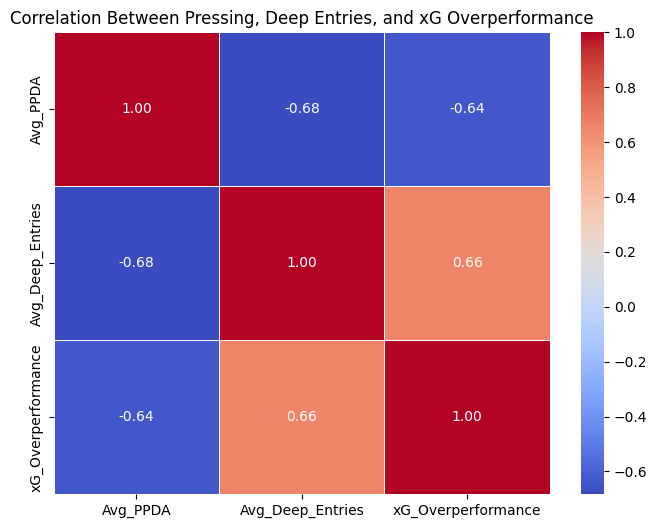

In [ ]:
### Compute correlation matrix
corr_matrix = team_stats_possession[['Avg_PPDA', 'Avg_Deep_Entries', 'xG_Overperformance']].corr()

### Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Pressing, Deep Entries, and xG Overperformance")
plt.show()

This correlation matrix highlights how pressing intensity (lower PPDA) and deep attacking entries are moderately linked to xG overperformance. These features, reflecting tactical intent, are strong candidates for predictive models aiming to forecast scoring efficiency and match success.


<ipython-input-16-f60b18c669ef>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




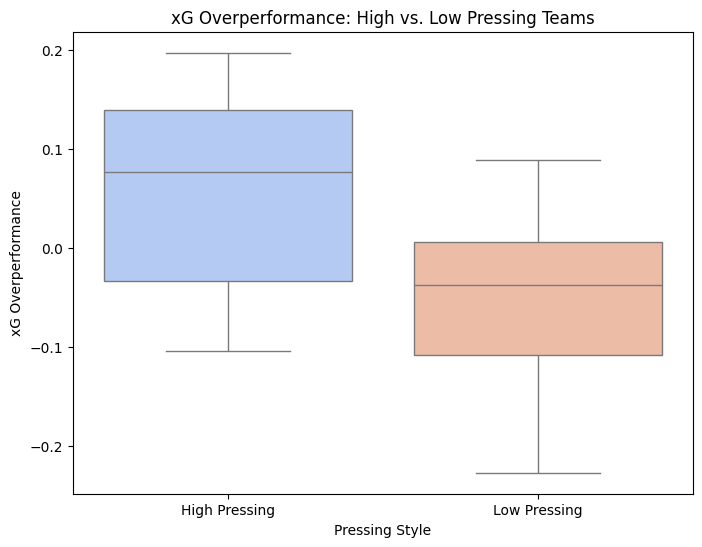

In [ ]:
### Create a new column to classify teams based on pressing intensity
team_stats_possession["Pressing_Category"] = team_stats_possession["Avg_PPDA"].apply(lambda x: "High Pressing" if x < team_stats_possession["Avg_PPDA"].median() else "Low Pressing")

### Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pressing_Category", y="xG_Overperformance", data=team_stats_possession, palette="coolwarm")
plt.title("xG Overperformance: High vs. Low Pressing Teams")
plt.xlabel("Pressing Style")
plt.ylabel("xG Overperformance")
plt.show()

High pressing teams tend to outperform their xG more than low pressing teams. This pattern supports including pressing metrics in classification models that predict match outcomes or efficiency.

<ipython-input-19-09c9c69538d1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




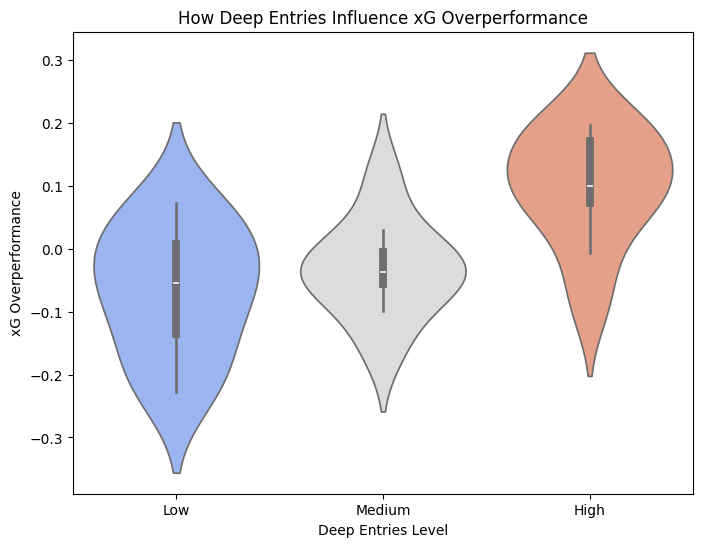

In [ ]:
### Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=pd.qcut(team_stats_possession["Avg_Deep_Entries"], q=3, labels=["Low", "Medium", "High"]),
               y="xG_Overperformance", data=team_stats_possession, palette="coolwarm")
plt.title("How Deep Entries Influence xG Overperformance")
plt.xlabel("Deep Entries Level")
plt.ylabel("xG Overperformance")
plt.show()

Teams with more deep entries consistently outperform xG, suggesting strong territorial dominance. This tactical marker may be a key variable in outcome prediction models.


**This EDA identified several key performance indicators (xG, shot accuracy, pressing intensity, and attacking entries) that correlate with match outcomes and exhibit predictive potential. These features will be carried forward into the modeling stage, where I will assess their effectiveness in forecasting results.**